# Hackathon 1, statistics.

This project illustrates the statistics part of the course LEPL1109. In the first part of the project, you will study the China water pollution by analyzing a dataset providing the water pollution levels collected from various monitoring stations across 10 major provinces in China throughout the year 2023. In the second part of the project, you will analyze a dataset containing high-frequency time-series  data collected from an industrial boiler operating in a chemical plant.

## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: 

Part. 2:

Part. 3:

Part. 4:

Part. 5:

Part. 6:

### Packages import

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sc
import statsmodels.api as sm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,Matern
import matplotlib.pyplot as plt

# China Water Pollution 

This dataset provides  water pollution levels collected from various monitoring stations across 10 major provinces in China throughout the year 2023. The data  includes  parameters such as pH, turbidity, chemical and biological oxygen demand, nutrient levels, and heavy metal concentrations. These indicators are widely used by environmental monitoring agencies to assess water quality for ecological, human, and industrial impacts.

We will focus on the Water Quality Index. 

## 1. Basic statistics

1.a) Load the dataset 'china_water_pollution_data_hack.csv'. Convert Province, City  to categorical variables. (**0.5 pt**) 

In [2]:
data = pd.read_csv("China_water_pollution/china_water_pollution_data_hack.csv")

data["Province"] = data["Province"].astype("category")
data["City"] = data["City"].astype("category")


1.b) Calculate the mean, variance, median, 25% and 75% quantiles of the water quality index (which ranges from 0 to 100) for all cities in the dataset. Comment your results! (**1.5 pts**)

In [3]:
desc = data.groupby("City")["Water_Quality_Index"].describe()
desc["variance"] = data.groupby("City")["Water_Quality_Index"].var()
desc["median"] = data.groupby("City")["Water_Quality_Index"].median()
print(desc[["mean","variance","median","25%","75%"]])
print("")

                mean   variance     median        25%        75%
City                                                            
Beijing    58.882070  24.447735  58.333333  56.070042  61.736875
Chengdu    54.405592  24.594466  54.795208  51.389167  57.267733
Dali       54.181129  31.266031  53.974083  50.662117  58.027806
Guangzhou  58.360981  34.337685  58.319458  54.687812  63.104396
Hangzhou   58.939443  30.310407  58.333333  55.000000  61.715646
Jinan      58.732275  24.629255  58.333333  55.000000  61.819708
Kunming    58.748408  24.475260  59.056500  55.251000  61.666667
Luoyang    53.289280  29.065348  53.238983  49.636475  56.347404
Mianyang   58.752162  29.738358  58.333333  55.000000  63.333333
Nanjing    54.166608  28.179058  53.842825  50.631592  57.835500
Ningbo     58.666299  27.020291  58.263958  55.000000  61.666667
Qingdao    58.393345  24.494630  58.333333  54.840438  61.757271
Shanghai   59.444212  22.332776  59.708625  56.409979  63.175021
Shenzhen   58.984718  27.

C:\Users\Florian\AppData\Local\Temp\ipykernel_21020\536806158.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc = data.groupby("City")["Water_Quality_Index"].describe()
C:\Users\Florian\AppData\Local\Temp\ipykernel_21020\536806158.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc["variance"] = data.groupby("City")["Water_Quality_Index"].var()
C:\Users\Florian\AppData\Local\Temp\ipykernel_21020\536806158.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adop

Comment here:

## 2. Hypothesis tests 

2.a) Check with a Student's T test that the average water quality index is the same in Shenzhen and Dali: $$H_0: \mu_{Shenzhen} = \mu_{Dali},\\
H_1: \mu_{Shenzhen} \neq \mu_{Dali}.$$ Calculate all statistics and p-value without recourse to other functions than statistical distributions (use course's formula). Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied? Which additional test do you have to do to validate your result? (**2.5 pts**)

In [4]:
n_Shenzhen = desc.loc["Shenzhen","count"]
Xb_Shenzhen = desc.loc["Shenzhen","mean"]
S_Shenzhen = desc.loc["Shenzhen","std"]

n_Dali = desc.loc["Dali","count"]
Xb_Dali = desc.loc["Dali","mean"]
S_Dali = desc.loc["Dali","std"]

Spool = np.sqrt(((n_Shenzhen-1)*S_Shenzhen**2+(n_Dali-1)*S_Dali**2)/(n_Shenzhen+n_Dali-2))

Tx = (Xb_Shenzhen-Xb_Dali)/(Spool*np.sqrt(1/n_Shenzhen+1/n_Dali))

alpha = 0.05
df = n_Shenzhen+n_Dali-2

pval = 2*sc.t.cdf(-np.abs(Tx),df=df)
print("The p-value is", pval)

print(S_Shenzhen**2 / S_Dali**2)

The p-value is 2.475049784541334e-13
0.8774002174461795


Comment here:

2.b) 'Wuhan', 'Luoyang', 'Chengdu', 'Nanjing', 'Dali' seems to have similar (and low) water quality index. Test the assumption: $$H_0:  \mu_{Wuhan} = \mu_{Luoyang}= \mu_{Chengdu} = \mu_{Nanjing} =\mu_{Dali}.$$
**Hint**: reformulate the problem as a linear regression.

(**2 pts**)

In [5]:
cities = ["Wuhan","Luoyang","Chengdu","Nanjing","Dali"]

data_subset = data[data["City"].isin(cities)].copy().reset_index(drop=True)
data_subset["City"] = pd.Categorical(data_subset["City"], categories=cities)

X = pd.get_dummies(data_subset["City"], drop_first=True, dtype="float64")
Xm = sm.add_constant(X)

results = sm.OLS(data_subset["Water_Quality_Index"],Xm).fit()
print("The p-value is", results.f_pvalue)
print("R^2 =", results.rsquared)


The p-value is 0.4262199233201662
R^2 = 0.005124598416676007


Comment here: 

## 3. Regressions

3.a) Propose a regression model which explains the Water_Quality_Index as a function of other explanatory variables, **for the city of Shanghai**. Split your data set into a training set (80% of the data) that you use for fitting the model and a test set (20% of the data) on which you test the accuracy of the model. 

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Identify potential non-relevant covariates
* Calculate the MAE on the test and training sets. 

(**3 pts**)

In [6]:
data_shanghai = data[data["City"] == "Shanghai"].copy().reset_index(drop=True)
n = len(data_shanghai)
n_training = 4*n // 5

X_training = data_shanghai.loc[:n_training-1,"Water_Temperature_C":"Coliform_Count_CFU_100mL"]
X_training = sm.add_constant(X_training)
Y_training = data_shanghai.loc[:n_training-1,"Water_Quality_Index"]

X_test = data_shanghai.loc[n_training:n-1,"Water_Temperature_C":"Coliform_Count_CFU_100mL"]
X_test = sm.add_constant(X_test)
Y_test = data_shanghai.loc[n_training:n-1,"Water_Quality_Index"]

results = sm.OLS(Y_training,X_training).fit()
print(results.summary())

MAE_training = np.mean(np.abs(results.predict(X_training)-Y_training))
print("MAE training :", MAE_training)

MAE_test = np.mean(np.abs(results.predict(X_test)-Y_test))
print("MAE test :", MAE_test)


                             OLS Regression Results                            
Dep. Variable:     Water_Quality_Index   R-squared:                       0.793
Model:                             OLS   Adj. R-squared:                  0.778
Method:                  Least Squares   F-statistic:                     55.40
Date:                 Fri, 31 Oct 2025   Prob (F-statistic):           8.20e-70
Time:                         14:39:57   Log-Likelihood:                -546.28
No. Observations:                  249   AIC:                             1127.
Df Residuals:                      232   BIC:                             1186.
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

Comment here: 

3.b) Same question as 3.a) but now you use a Gaussian process regression. Use a RBF and Matern kernel and compare MAEs of the 2 models. Which one is the best? (**2 pts**)

In [7]:
kernel = RBF()
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=10)
gp.fit(X_training, Y_training)

MAE_training_rbf = np.mean(np.abs(gp.predict(X_training)-Y_training))
print("MAE training RBF :", MAE_training_rbf)

MAE_test_rbf = np.mean(np.abs(gp.predict(X_test)-Y_test))
print("MAE test RBF :", MAE_test_rbf)


kernel = Matern()
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=10)
gp.fit(X_training, Y_training)

MAE_training_matern = np.mean(np.abs(gp.predict(X_training)-Y_training))
print("MAE training MATERN :", MAE_training_matern)

MAE_test_matern = np.mean(np.abs(gp.predict(X_test)-Y_test))
print("MAE test MATERN :", MAE_test_matern)


MAE training RBF : 6.711369601964771e-09
MAE test RBF : 5.7942878779799205
MAE training MATERN : 3.751656998449918e-09
MAE test MATERN : 3.75706202823689


Comment here: 

# Boiler

![furnace_plotL](boiler/furnace_plotL.PNG)

This dataset contains high-frequency time-series  data collected (every 5 seconds) from an industrial boiler operating in a chemical plant. The boiler is equipped with multiple sensors capturing parameters such as pressure, temperature, flow rate, and oxygen levels. The dataset reflects a real-world industrial scenario. The boiler outlet steam temperature, ranging typically from 530 °C to 545 °C during stable operation, is used as the key indicator of equipment state. Deviations outside this range represent abnormal operating conditions. 

## 4. Poisson Process

4. During stable operations, the outlet steam temperature is in the interval 530 °C to 545 °C. 

a) Load the dataset 'data_boiler.csv', plot the Boiler outlet steam temperature (variable 'TE_8332A.AV_0') and count the number of times this temperature is outside this normal range. What do you observe? (**1 pt**)

température hors de l'intervalle normal : 7037


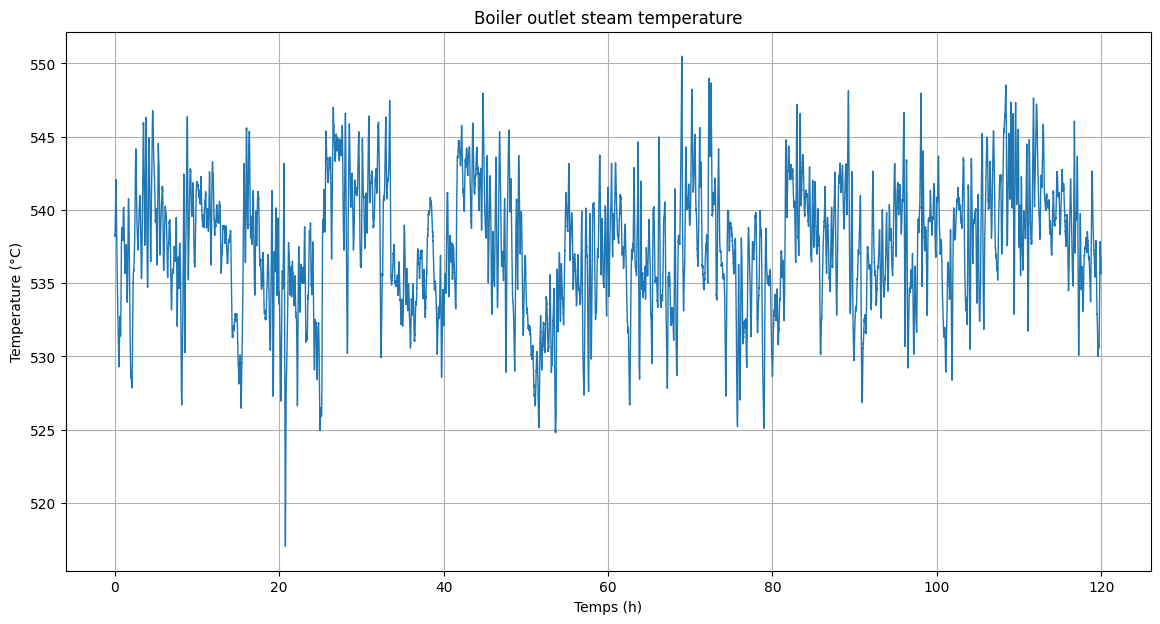

In [8]:
data = pd.read_csv("Boiler/data_boiler.csv")
n = len(data['TE_8332A.AV_0#'])

plt.figure(figsize=(14,7))
plt.plot(np.linspace(0,5*n,n)/3600,data['TE_8332A.AV_0#'],linewidth=1)
plt.title("Boiler outlet steam temperature")
plt.xlabel('Temps (h)')
plt.ylabel('Temperature (°C)')
plt.grid(True)

count = 0
for t in data['TE_8332A.AV_0#']:
    if t < 530 or t > 545 :
        count += 1
print("température hors de l'intervalle normal :", count)

Comment here: 

b) A Poisson process, denoted by $N_t$ is a counting process. The number of events observed during an interval [0,t] is distributed according to a Poisson law with a parameter $\lambda \times t$. Using the method of moment, estimate $\lambda \times t$, the frequency of overheating **or** underheating (i.e. when we are outside the interval) per hour.

Remark: do not forget that time-series data are collected every 5 seconds.

(**1.5 pt**)

In [9]:
dt = n*5 / 3600
lam = count/dt
print("frequence :", lam)

frequence : 58.641666666666666


c) Calculate the probability of observing more ( >= ) than 50 abnormal temperatures on 1h. (**1 pt**)

In [10]:
p = 1 - sc.poisson.cdf(49,lam)
print("probability :", p)


probability : 0.8858156859855504


Comment here: 

## 5. Fit of distributions and forecasting 

5. The induced draft fan motor current must in normal condition stay below 30 Amp. A current above 30 Amp may cause damage to the installation. 

a) Fit a Gamma and an exponentiated Weibull distributions to the variable YFJ3_AI.AV_0. Compare histograms and  densities, and choose the most appropriate distribution. Using the most appropriate distribution, determine the probability that over a similar period of time, we observe a peak of induced draft fan motor current above 30 Amp. 
(**3 pts**)

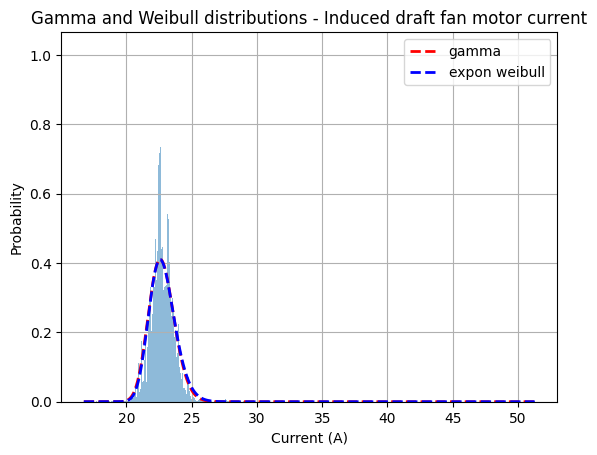

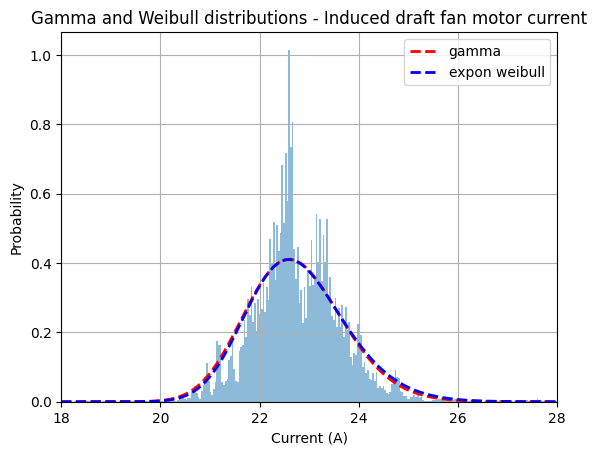

log-vraisembance gamma : -119739.70951714725
log-vraisemblance exponentiel Weibull : -119762.9994407259
probability (gamma) : 2.651745711901299e-09


In [11]:
shape, loc, scale = sc.gamma.fit(data['YFJ3_AI.AV_0#'])
rv_gamma = sc.gamma(shape, loc=loc, scale=scale)

a, c, loc, scale = sc.exponweib.fit(data['YFJ3_AI.AV_0#'])
rv_exponweib = sc.exponweib(a, c, loc=loc, scale=scale)

x = np.linspace(min(data['YFJ3_AI.AV_0#']), max(data['YFJ3_AI.AV_0#']), 10000)

plt.hist(data['YFJ3_AI.AV_0#'], bins=1000, density=True, alpha=0.5)
plt.plot(x, rv_gamma.pdf(x), 'r--', lw=2, label='gamma')
plt.plot(x, rv_exponweib.pdf(x), 'b--', lw=2, label='expon weibull')
plt.title("Gamma and Weibull distributions - Induced draft fan motor current")
plt.xlabel('Current (A)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.hist(data['YFJ3_AI.AV_0#'], bins=1000, density=True, alpha=0.5)
plt.plot(x, rv_gamma.pdf(x), 'r--', lw=2, label='gamma')
plt.plot(x, rv_exponweib.pdf(x), 'b--', lw=2, label='expon weibull')
plt.xlim((18,28))
plt.title("Gamma and Weibull distributions - Induced draft fan motor current")
plt.xlabel('Current (A)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

plt.show()


log_vr_gamma = np.sum(rv_gamma.logpdf(data['YFJ3_AI.AV_0#']))
print("log-vraisembance gamma :", log_vr_gamma)
log_vr_exponweib = np.sum(rv_exponweib.logpdf(data['YFJ3_AI.AV_0#']))
print("log-vraisemblance exponentiel Weibull :", log_vr_exponweib)

p = 1 - rv_gamma.cdf(30)
print("probability (gamma) :", p)


Comment here: 

b) You want to set up a prediction algorithm of over- and under-heating (variable TE_8332A.AV_0). The aim is to anticipate any abnormal deviation to take necessary measures for driving back the temperature in $[530 ; 545]$. For this purpose, you will use the measure at time $ t - lag \times 5s$ for predicting the steam temperature at time t, where $lag$ is the number of 5-seconds lags. The model to fit is of the form:
$$Y_t = \beta_0 + \beta_1 X^1_{t-lag}+\beta_2 X^2_{t-lag}+...+\beta_n X^n_{t-lag}+\beta_{n+1} Y_{t-lag}+\varepsilon,\\$$
where $Y$ is the target variable (i.e. TE_8332A.AV_0), $(X^1,...,X^n)$ are all the explanatory variables (i.e. all the variables except TE_8332A.AV_0) and $\varepsilon \sim N(0,1).$

* Create a dataset such that for each date $t$ (each line), you have the target variable at time $t$ and the explanatory variables at time $t-lag \times 5s$.
* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* If an explanatory variable is not significant, remove it from your model.
* Test different lags and determine  the maximum number of lags, such that the probabilities that your model detects over- and under-heatings are above 90%

(**4 pts**)

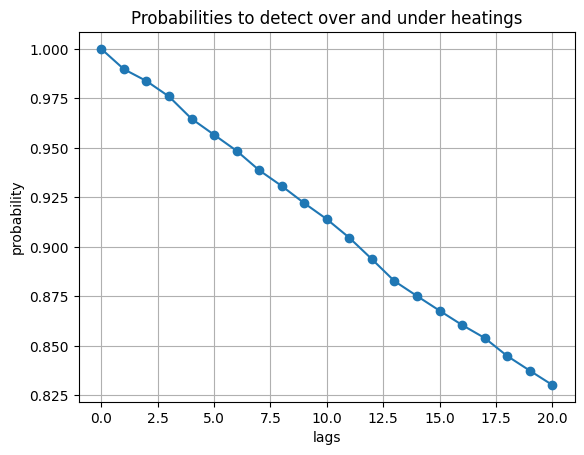

In [15]:
def create_dataset(lag):
    index = np.arange(lag)

    A = data[['date','TE_8332A.AV_0#']].drop(index).copy().reset_index(drop=True)
    A.columns = ['date','temperature']
    B = data.drop('date',axis=1).shift(lag).drop(index).copy().reset_index(drop=True)

    return pd.concat([A,B], axis=1)


def linear_reg(dataset, alpha=0.05):

    X = sm.add_constant(dataset.drop(['date','temperature'], axis=1))
    Y = dataset['temperature']

    removed_var = []
    
    while True:
        results = sm.OLS(Y, X).fit()
        pvalues = results.pvalues.drop('const')

        max_pval = pvalues.max()
        if max_pval > alpha:
            var_to_remove = pvalues.idxmax()
            X = X.drop([var_to_remove],axis=1)
            removed_var.append(var_to_remove)
        else:
            break
    
    return results, removed_var


lags = np.arange(21)
rapports = []
rapports_low = []
rapports_high = []

for lag in lags:
    dataset = create_dataset(lag)
    results, removed_var = linear_reg(dataset)
    removed_var.append('temperature')
    removed_var.append('date')
    y_predict = results.predict(sm.add_constant(dataset.drop(removed_var,axis=1)))

    N_low = 0
    n_low = 0
    N_high = 0
    n_high = 0

    for i in range(len(y_predict)):
        if dataset['temperature'].iloc[i] < 530 :
            N_low += 1
            if y_predict.iloc[i] < 530 :
                n_low += 1
        
        elif dataset['temperature'].iloc[i] > 545 :
            N_high += 1
            if y_predict.iloc[i] > 545 :
                n_high += 1
    
    N = N_low + N_high
    n = n_low + n_high

    rapport = n/N if N > 0 else np.nan
    rapports.append(rapport)

    rapport_low = n_low/N_low if N_low > 0 else np.nan
    rapports_low.append(rapport_low)

    rapport_high = n_high/N_high if N_high > 0 else np.nan
    rapports_high.append(rapport_high)


plt.plot(lags,rapports,marker='o')
plt.title("Probabilities to detect over and under heatings")
plt.xlabel('lags')
plt.ylabel('probability')
plt.grid(True)
plt.show()



Comment here:

c)  Compare the probabilities that your model detects over- and under-heatings. (**1 pt**)

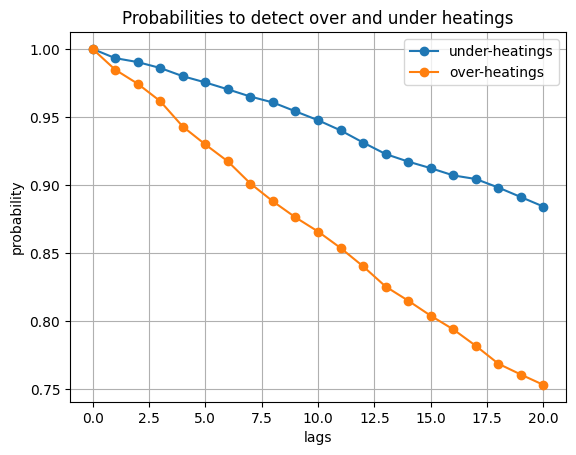

In [14]:
plt.plot(lags,rapports_low, label='under-heatings',marker ='o')
plt.plot(lags,rapports_high,label='over-heatings',marker='o')
plt.title("Probabilities to detect over and under heatings")
plt.xlabel('lags')
plt.ylabel('probability')
plt.legend()
plt.grid(True)
plt.show()

Comment here: 